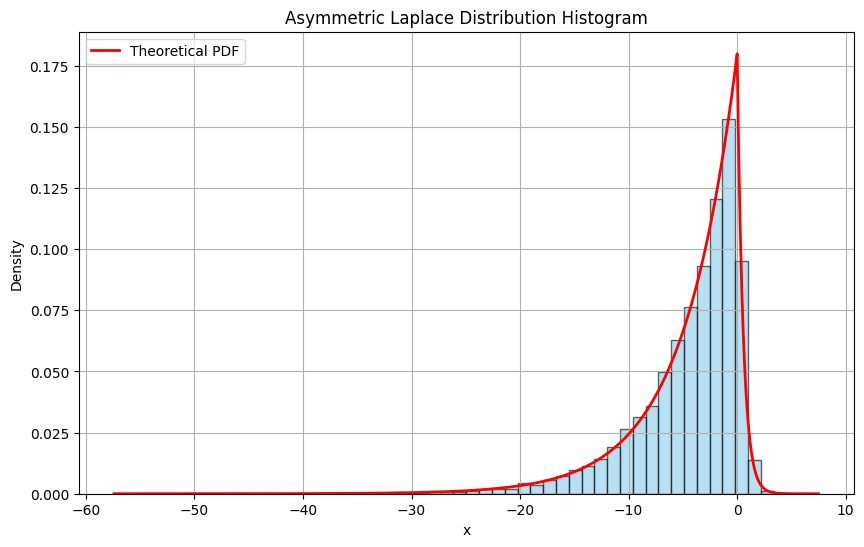

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def sample_asymmetric_laplace(m, lam, p, N, random_seed=None):
    """
    Samples N data points from an asymmetric Laplace distribution.

    Parameters:
    - m (float): Location parameter.
    - lambda_ (float): Scale parameter (lambda > 0).
    - kappa (float): Asymmetry parameter (kappa > 0).
    - N (int): Number of data points to sample.
    - random_seed (int, optional): Seed for reproducibility.

    Returns:
    - samples (np.ndarray): Array of sampled data points.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # kappa = np.sqrt(p / (1 - p))
    # Probability of sampling from the right side (x >= m)
    
    # Generate N uniform random numbers to decide the side for each sample
    uniform_samples = np.random.uniform(0, 1, N)

    samples = np.where(
        uniform_samples < p,
        m - ((lam / (1 - p)) * np.log(p / uniform_samples)),
        m + ((lam / p) * np.log((1 - p) / (1 - uniform_samples)))
    )
    
    return samples

def plot_histogram(samples, m, lam, p, bins=50):
    """
    Plots a histogram of the sampled data.

    Parameters:
    - samples (np.ndarray): Array of sampled data points.
    - m (float): Location parameter.
    - lambda_ (float): Scale parameter.
    - kappa (float): Asymmetry parameter.
    - bins (int): Number of histogram bins.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=bins, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    
    # Overlay the theoretical PDF
    x_min, x_max = plt.xlim()
    x = np.linspace(x_min, x_max, 10000)

    pdf = p * (1 - p) / lam * np.where(
        x <= m,
        np.exp((1-p) / lam * (x - m)),
        np.exp(-p / lam * (x - m))
    )
    
    plt.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')
    
    plt.title('Asymmetric Laplace Distribution Histogram')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()


# Parameters
m = 0          # Location parameter
lam = 0.5   # Scale parameter (must be > 0)
p = 0.9     # Asymmetry parameter (p > 0) -- probability of sampling from the left side of m
N = 10000      # Number of samples
random_seed = 42  # For reproducibility

# Sample from the asymmetric Laplace distribution
samples = sample_asymmetric_laplace(m, lam, p, N, random_seed)

# Plot the histogram
plot_histogram(samples, m, lam, p)
